# Bigrams

In [5]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [6]:
papers = pd.read_csv("table_1_eligible.csv", index_col=[0]) #dataframe derived from medline file
papers.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [7]:
abstracts_full = papers[["Abstract", "Year"]]

In [8]:
def convert_ogri_names(text):
    substitutions = {"average nucleotide identity":"ani",
                     "in silico dna-dna hybridization":"dddh",
                     "digital dna-dna hybridization":"dddh",
                     "genome-to-genome distance calculator": "ggdc",
                     "genome to genome distance calculator": "ggdc",
                     "genome-to-genome distance":"ggd",
                     "genome to genome distance":"ggd"}
    for i,j in substitutions.items():
        text = text.lower().replace(i,j)
    return(text)

abstracts_full["Abstract"] = abstracts_full["Abstract"].apply(convert_ogri_names)


teste = "in silico DNA-DNA hybridization"
convert_ogri_names(teste)

/home/fernando/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


'dddh'

In [9]:
stop = stopwords.words('english')

In [10]:
def freq_bigram_by_year(year):
    abstracts_year = abstracts_full[abstracts_full["Year"] == year]["Abstract"]
    
    abstracts_year_cat = abstracts_year.str.cat(sep=" ")
    
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
    transtab = str.maketrans(dict.fromkeys(punct, ''))
    abstracts_year_no_punct = abstracts_year_cat.translate(transtab)
    
    stop_words = stopwords.words('english')
    word_tokens_year = word_tokenize(abstracts_year_no_punct.lower()) 
    
    filtered_sentence_year = [] 
    for w in word_tokens_year: 
        if w not in stop_words: 
            filtered_sentence_year.append(w)
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_year = []
    
    
    for w in filtered_sentence_year:
        lemmatized_w = wordnet_lemmatizer.lemmatize(w)
        lemmatized_year.append(lemmatized_w)
    
    #bigrams
    bigramFinder_year = nltk.collocations.BigramCollocationFinder.from_words(lemmatized_year)
    bigram_freq_year = bigramFinder_year.ngram_fd.items()
    bigramFreqTable_year = pd.DataFrame(list(bigram_freq_year), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    bigramFreqTable_year.to_csv("{}_bigram_freq.csv".format(year))
 

In [11]:
for i in range(2001,2019):
    freq_bigram_by_year(i)

In [12]:
#frequency from all
abstracts_all = abstracts_full["Abstract"]
abstracts_cat = abstracts_all.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_all_no_punct = abstracts_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(abstracts_all_no_punct.lower()) 
  
filtered_sentence_all = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence_all.append(w)    

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_all = []

for w in filtered_sentence_all:
    lemmatized_w = wordnet_lemmatizer.lemmatize(w)
    lemmatized_all.append(lemmatized_w)
        
bigramFinder_all = nltk.collocations.BigramCollocationFinder.from_words(lemmatized_all)
bigram_freq_all = bigramFinder_all.ngram_fd.items()
bigramFreqTable_all = pd.DataFrame(list(bigram_freq_all), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

bigramFreqTable_all

,bigram,freq
28,"(type, strain)",13811
16,"(16, rrna)",13057
17,"(rrna, gene)",12434
18,"(gene, sequence)",11820
126,"(sp, nov)",10435
75,"(fatty, acid)",8249
120,"(novel, specie)",8078
121,"(specie, genus)",6809
40,"(sequence, similarity)",6787
127,"(nov, proposed)",6576


In [13]:
n_year = pd.DataFrame(abstracts_full["Year"].value_counts()).reset_index()
n_year


,index,Year
0,2015,898
1,2017,865
2,2013,844
3,2016,774
4,2014,755
5,2018,646
6,2012,556
7,2011,528
8,2009,525
9,2010,524


In [14]:
#itens per year
n_year.columns = ["Year", "Frequency"]
n_year = n_year.sort_values(by="Year")
n_year_ed = n_year.set_index("Year")
n_year_transposed = n_year_ed.transpose()
n_year_transposed.columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
n_year_transposed

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Frequency,178,231,263,325,373,415,498,481,525,524,528,556,844,755,898,774,865,646


In [15]:
bigramFreqTable_2001 = pd.read_table('2001_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2002 = pd.read_table('2002_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2003 = pd.read_table('2003_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2004 = pd.read_table('2004_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2005 = pd.read_table('2005_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2006 = pd.read_table('2006_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2007 = pd.read_table('2007_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2008 = pd.read_table('2008_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2009 = pd.read_table('2009_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2010 = pd.read_table('2010_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2011 = pd.read_table('2011_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2012 = pd.read_table('2012_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2013 = pd.read_table('2013_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2014 = pd.read_table('2014_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2015 = pd.read_table('2015_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2016 = pd.read_table('2016_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2017 = pd.read_table('2017_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2018 = pd.read_table('2018_bigram_freq.csv', sep=',', index_col=0)

dfs = [bigramFreqTable_2001, bigramFreqTable_2002, bigramFreqTable_2003, bigramFreqTable_2004, bigramFreqTable_2005, bigramFreqTable_2006, bigramFreqTable_2007, bigramFreqTable_2008, bigramFreqTable_2009, bigramFreqTable_2010, bigramFreqTable_2011, bigramFreqTable_2012, bigramFreqTable_2013, bigramFreqTable_2014, bigramFreqTable_2015, bigramFreqTable_2016, bigramFreqTable_2017, bigramFreqTable_2018]
from functools import reduce

In [16]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='bigram'), dfs)
df_final.columns = ["bigram", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018" ]

In [17]:
df_final = df_final.set_index("bigram")

In [18]:
df_final.head(3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
bigram,,,,,,,,,,,,,,,,,,
"('type', 'strain')",195,278,282,398,480,570,703,743,830,796,744,813,1278,1182,1336,1100,1208,875
"('sp', 'nov')",175,234,250,377,424,479,569,543,614,583,575,611,893,800,934,814,900,660
"('16', 'rrna')",93,131,147,321,495,597,730,719,761,785,797,794,1212,1097,1243,1090,1186,859


In [19]:
relative = df_final.div(n_year_transposed.iloc[0])

In [20]:
transposed_relative = relative.T
transposed_relative

bigram,"('type', 'strain')","('sp', 'nov')","('16', 'rrna')","('new', 'specie')","('degree', 'c')","('fatty', 'acid')","('gc', 'content')","('rrna', 'gene')","('nov', 'type')","('dna-dna', 'hybridization')",...,"('chemotaxonomic', 'characterization')","('considered', 'represent')","('also', 'supported')","('profile', 'contained')","('short', 'rod')","('transcribed', 'spacer')","('similarity', 'dna-dna')","('strain', 'contained')","('ubiquinone', '10')","('phylogenetic', 'relative')"
2001,1.095506,0.983146,0.522472,0.511236,0.426966,0.410112,0.393258,0.365169,0.365169,0.359551,...,0.005618,0.005618,0.005618,0.005618,0.005618,0.005618,0.005618,0.005618,0.005618,0.005618
2002,1.203463,1.012987,0.567100,0.212121,0.536797,0.545455,0.389610,0.454545,0.367965,0.359307,...,0.004329,0.008658,0.021645,0.004329,0.008658,0.017316,0.012987,0.025974,0.004329,0.034632
2003,1.072243,0.950570,0.558935,0.182510,0.612167,0.593156,0.239544,0.486692,0.311787,0.315589,...,0.003802,0.003802,0.007605,0.003802,0.034221,0.007605,0.026616,0.019011,0.003802,0.022814
2004,1.224615,1.160000,0.987692,0.123077,0.418462,0.596923,0.381538,0.913846,0.356923,0.329231,...,0.006154,0.009231,0.009231,0.003077,0.015385,0.021538,0.018462,0.009231,0.003077,0.021538
2005,1.286863,1.136729,1.327078,0.104558,0.463807,0.718499,0.498660,1.273458,0.372654,0.359249,...,0.005362,0.029491,0.008043,0.005362,0.021448,0.013405,0.021448,0.016086,0.002681,0.034853
2006,1.373494,1.154217,1.438554,0.069880,0.474699,0.696386,0.534940,1.390361,0.375904,0.334940,...,0.002410,0.031325,0.004819,0.002410,0.019277,0.012048,0.024096,0.016867,0.007229,0.021687
2007,1.411647,1.142570,1.465863,0.054217,0.532129,0.853414,0.648594,1.403614,0.259036,0.297189,...,0.006024,0.056225,0.004016,0.004016,0.024096,0.004016,0.016064,0.026104,0.006024,0.028112
2008,1.544699,1.128898,1.494802,0.027027,0.588358,0.783784,0.642412,1.440748,0.291060,0.330561,...,0.004158,0.110187,0.008316,0.004158,0.039501,0.008316,0.008316,0.010395,0.008316,0.029106
2009,1.580952,1.169524,1.449524,0.034286,0.582857,0.786667,0.636190,1.411429,0.325714,0.335238,...,0.001905,0.131429,0.007619,0.003810,0.013333,0.017143,0.015238,0.026667,0.011429,0.020952
2010,1.519084,1.112595,1.498092,0.041985,0.576336,0.872137,0.666031,1.431298,0.320611,0.282443,...,0.003817,0.152672,0.007634,0.005725,0.026718,0.001908,0.019084,0.030534,0.009542,0.038168


In [21]:
new_specie = transposed_relative["('sp', 'nov')"]
new_specie.index.name = 'year'
new_specie = new_specie.reset_index()
new_specie.columns = ["year", "freq"]
new_specie.columns

Index(['year', 'freq'], dtype='object')

In [22]:
new_genus = transposed_relative["('gen', 'nov')"]
new_genus.index.name = 'year'
new_genus = new_genus.reset_index()
new_genus.columns = ["year", "freq"]
new_genus.columns

Index(['year', 'freq'], dtype='object')

In [23]:
s16_rrna = transposed_relative["('16', 'rrna')"]
s16_rrna.index.name = 'year'
s16_rrna = s16_rrna.reset_index()
s16_rrna.columns = ["year", "freq"]
s16_rrna.columns

Index(['year', 'freq'], dtype='object')

In [24]:
fatty_acid = transposed_relative["('fatty', 'acid')"]
fatty_acid.index.name = 'year'
fatty_acid = fatty_acid.reset_index()
fatty_acid.columns = ["year", "freq"]
fatty_acid.columns

Index(['year', 'freq'], dtype='object')

In [25]:
gc_content = transposed_relative["('gc', 'content')"]
gc_content.index.name = 'year'
gc_content = gc_content.reset_index()
gc_content.columns = ["year", "freq"]
gc_content.columns

Index(['year', 'freq'], dtype='object')

In [26]:
phylogenetic_analysis = transposed_relative["('phylogenetic', 'analysis')"]
phylogenetic_analysis.index.name = 'year'
phylogenetic_analysis = phylogenetic_analysis.reset_index()
phylogenetic_analysis.columns = ["year", "freq"]
phylogenetic_analysis.columns

Index(['year', 'freq'], dtype='object')

In [27]:
polar_lipid = transposed_relative["('polar', 'lipid')"]
polar_lipid.index.name = 'year'
polar_lipid = polar_lipid.reset_index()
polar_lipid.columns = ["year", "freq"]
polar_lipid.columns

Index(['year', 'freq'], dtype='object')

In [28]:
dna_hybridization = transposed_relative["('dna-dna', 'hybridization')"]
dna_hybridization.index.name = 'year'
dna_hybridization = dna_hybridization.reset_index()
dna_hybridization.columns = ["year", "freq"]
dna_hybridization.columns

Index(['year', 'freq'], dtype='object')

In [29]:
respiratory_quinone = transposed_relative["('respiratory', 'quinone')"]
respiratory_quinone.index.name = 'year'
respiratory_quinone = respiratory_quinone.reset_index()
respiratory_quinone.columns = ["year", "freq"]
respiratory_quinone.columns

Index(['year', 'freq'], dtype='object')

# Figure 9

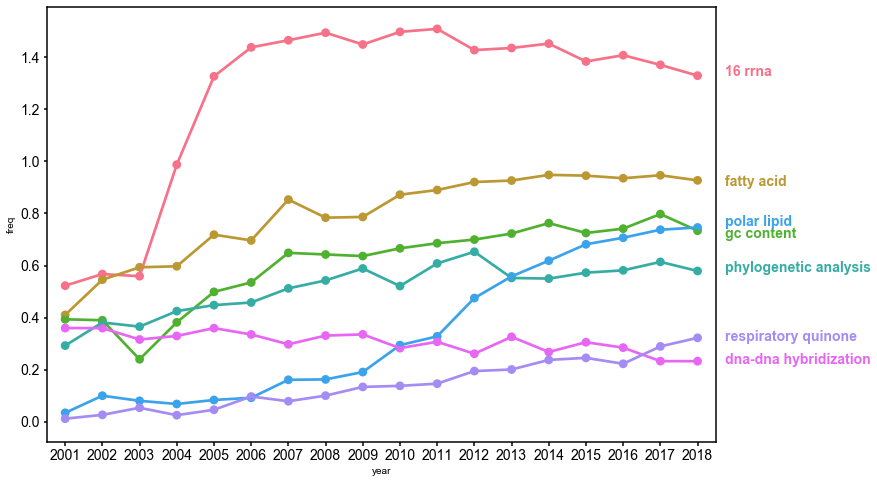

In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.pointplot(x="year", y="freq", data=s16_rrna, color="#f77189")
fig.text(x = 0.91, y = 0.76, s = "16 rrna", family='sans-serif', fontsize=14, weight = "bold", color="#f77189")
sns.pointplot(x="year", y="freq", data=fatty_acid, color="#bb9832")
fig.text(x = 0.91, y = 0.57, s = "fatty acid", family='sans-serif', fontsize=14, weight = "bold", color="#bb9832")
sns.pointplot(x="year", y="freq", data=gc_content, color="#50b131")
fig.text(x = 0.91, y = 0.48, s = "gc content", family='sans-serif', fontsize=14, weight = "bold", color="#50b131")
sns.pointplot(x="year", y="freq", data=phylogenetic_analysis, color="#36ada4")
fig.text(x = 0.91, y = 0.42, s = "phylogenetic analysis", family='sans-serif', fontsize=14, weight = "bold", color="#36ada4")
sns.pointplot(x="year", y="freq", data=polar_lipid, color="#3ba3ec")
fig.text(x = 0.91, y = 0.50, s = "polar lipid", family='sans-serif', fontsize=14, weight = "bold", color="#3ba3ec")
sns.pointplot(x="year", y="freq", data=dna_hybridization, color="#e866f4")
fig.text(x = 0.91, y = 0.26, s = "dna-dna hybridization", family='sans-serif', fontsize=14, weight = "bold", color="#e866f4")
sns.pointplot(x="year", y="freq", data=respiratory_quinone, color="#a48cf4")
fig.text(x = 0.91, y = 0.30, s = "respiratory quinone", weight = "bold", family='sans-serif', fontsize=14, color="#a48cf4")

fig.savefig('bigram.svg', format='svg', dpi=600)

# Tables containing absolute and relative numbers

In [33]:
bigrams_abs = df_final.loc[["('16', 'rrna')","('fatty', 'acid')","('gc', 'content')",
                            "('phylogenetic', 'analysis')","('polar', 'lipid')", "('dna-dna', 'hybridization')",
                            "('respiratory', 'quinone')"]]
bigrams_abs.to_csv("bigrams_abs.csv", sep="\t")


bigrams_rel = relative.loc[["('16', 'rrna')","('fatty', 'acid')","('gc', 'content')",
                            "('phylogenetic', 'analysis')","('polar', 'lipid')", "('dna-dna', 'hybridization')",
                            "('respiratory', 'quinone')"]]
bigrams_rel.to_csv("bigrams_rel.csv", sep="\t")
